#### Imports

In [1]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from glob import glob

import os
import cv2
import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import keras
from keras.models import load_model
from keras import layers, regularizers, optimizers
from keras.applications.resnet50 import ResNet50
from keras import layers, models, regularizers, optimizers
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.models import Model, Sequential
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint

from classification_models.keras import Classifiers

from keras_tqdm import TQDMNotebookCallback 

Using TensorFlow backend.


In [ ]:
# Import helper functions
from helper_functions import *

##### Create generators

In [5]:
# Import preprocessing functions for ResNet-18 and ResNet-34
ResNet18, preprocess_input_resnet18 = Classifiers.get('resnet18')
ResNet34, preprocess_input_resnet34 = Classifiers.get('resnet34')

In [6]:
test_datagen_vgg16    = ImageDataGenerator(rescale=1./255)
test_datagen_resnet18 = ImageDataGenerator(preprocessing_function=preprocess_input_resnet18)
test_datagen_resnet34 = ImageDataGenerator(preprocessing_function=preprocess_input_resnet34)

##### Define test directories

In [7]:
test_dir_regular  = os.path.join(os.getcwd(), '../data/regular/test')
test_dir_enhanced = os.path.join(os.getcwd(), '../data/enhanced/test')

### Enhanced dataset no augmentation

In [8]:
os.listdir('enhanced-no-augmentation')

['ResNet-18-0.6517-28.hdf5',
 'ResNet-34-0.6767-52.hdf5',
 'VGG16-0.6917-15.hdf5']

#### VGG16

Found 460 images belonging to 2 classes.
making predictions...
making confusion matrix...


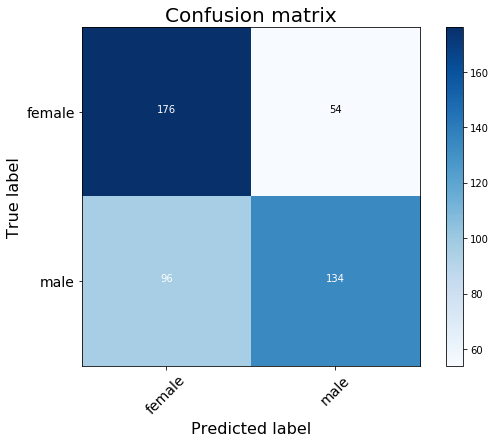

Classification Report 
               precision    recall  f1-score   support

      female       0.65      0.77      0.70       230
        male       0.71      0.58      0.64       230

    accuracy                           0.67       460
   macro avg       0.68      0.67      0.67       460
weighted avg       0.68      0.67      0.67       460

evaluating predictions...

Loss: 0.666
Accuracy: 67.39%


In [12]:
enhanced_vgg16 = load_model('enhanced-no-augmentation/VGG16-0.6917-15.hdf5')
predictions, labels = evaluate_model(enhanced_vgg16, test_datagen_vgg16, test_dir_enhanced, batch_size=100)

#### ResNet-34

Found 460 images belonging to 2 classes.
making predictions...
making confusion matrix...


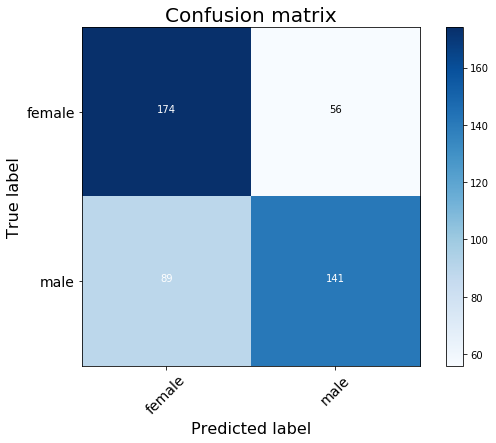

Classification Report 
               precision    recall  f1-score   support

      female       0.66      0.76      0.71       230
        male       0.72      0.61      0.66       230

    accuracy                           0.68       460
   macro avg       0.69      0.68      0.68       460
weighted avg       0.69      0.68      0.68       460

evaluating predictions...

Loss: 0.640
Accuracy: 68.48%


In [13]:
enhanced_resnet34 = load_model('enhanced-no-augmentation/ResNet-34-0.6767-52.hdf5')
predictions, labels = evaluate_model(enhanced_resnet34, test_datagen_resnet34, test_dir_enhanced, batch_size=100)

#### ResNet-18

Found 460 images belonging to 2 classes.
making predictions...
making confusion matrix...


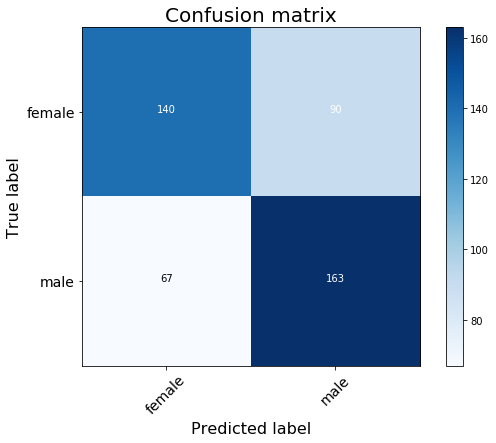

Classification Report 
               precision    recall  f1-score   support

      female       0.68      0.61      0.64       230
        male       0.64      0.71      0.67       230

    accuracy                           0.66       460
   macro avg       0.66      0.66      0.66       460
weighted avg       0.66      0.66      0.66       460

evaluating predictions...

Loss: 0.498
Accuracy: 65.87%


In [14]:
enhanced_resnet18 = load_model('enhanced-no-augmentation/ResNet-18-0.6517-28.hdf5')
predictions, labels = evaluate_model(enhanced_resnet18, test_datagen_resnet18, test_dir_enhanced, batch_size=100)

### Enhanced dataset with augmentation

In [15]:
os.listdir('enhanced-with-augmentation')

['ResNet-18-0.6833-07.hdf5',
 'ResNet-34-0.6833-05.hdf5',
 'VGG16-0.6967-24.hdf5']

#### VGG16

Found 460 images belonging to 2 classes.
making predictions...
making confusion matrix...


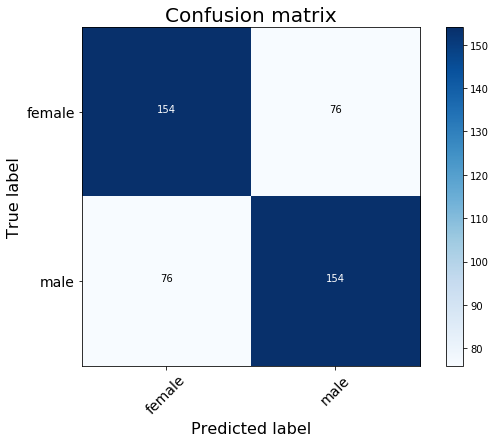

Classification Report 
               precision    recall  f1-score   support

      female       0.67      0.67      0.67       230
        male       0.67      0.67      0.67       230

    accuracy                           0.67       460
   macro avg       0.67      0.67      0.67       460
weighted avg       0.67      0.67      0.67       460

evaluating predictions...

Loss: 0.584
Accuracy: 66.96%


In [16]:
enhanced_augmented_vgg16 = load_model('enhanced-with-augmentation/VGG16-0.6967-24.hdf5')
predictions, labels = evaluate_model(enhanced_augmented_vgg16, test_datagen_vgg16, test_dir_enhanced, batch_size=100)

#### ResNet-34

Found 460 images belonging to 2 classes.
making predictions...
making confusion matrix...


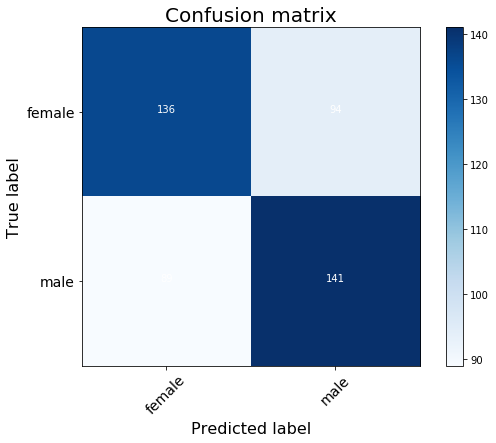

Classification Report 
               precision    recall  f1-score   support

      female       0.60      0.59      0.60       230
        male       0.60      0.61      0.61       230

    accuracy                           0.60       460
   macro avg       0.60      0.60      0.60       460
weighted avg       0.60      0.60      0.60       460

evaluating predictions...

Loss: 2.872
Accuracy: 60.22%


In [17]:
enhanced_augmented_resnet34 = load_model('enhanced-with-augmentation/ResNet-34-0.6833-05.hdf5')
predictions, labels = evaluate_model(enhanced_augmented_resnet34, test_datagen_resnet34, test_dir_enhanced, batch_size=100)

#### ResNet-18

Found 460 images belonging to 2 classes.
making predictions...
making confusion matrix...


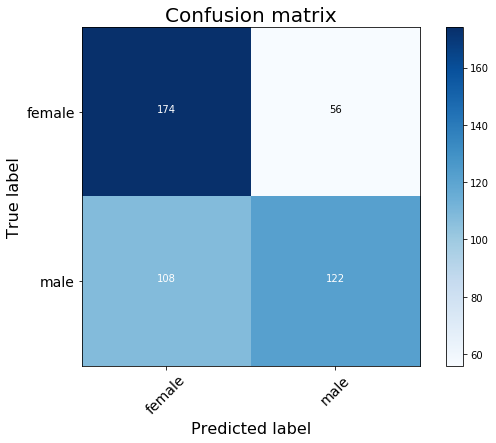

Classification Report 
               precision    recall  f1-score   support

      female       0.62      0.76      0.68       230
        male       0.69      0.53      0.60       230

    accuracy                           0.64       460
   macro avg       0.65      0.64      0.64       460
weighted avg       0.65      0.64      0.64       460

evaluating predictions...

Loss: 0.790
Accuracy: 64.35%


In [18]:
enhanced_augmented_resnet18 = load_model('enhanced-with-augmentation/ResNet-18-0.6833-07.hdf5')
predictions, labels = evaluate_model(enhanced_augmented_resnet18, test_datagen_resnet18, test_dir_enhanced, batch_size=100)

### Regular dataset no augmentation

In [19]:
os.listdir('regular-no-augmentation')

['ResNet-18-0.6600-39.hdf5',
 'ResNet-34-0.7200-31.hdf5',
 'VGG16-0.7000-05.hdf5']

#### VGG16

Found 460 images belonging to 2 classes.
making predictions...
making confusion matrix...


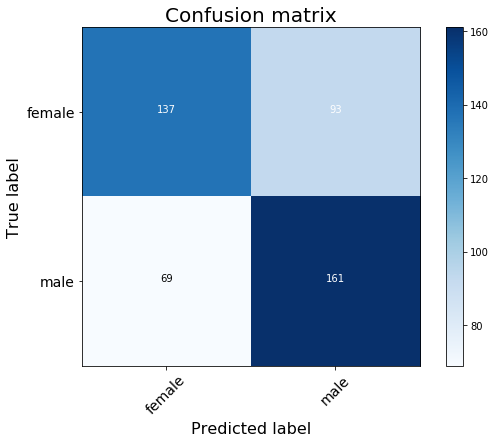

Classification Report 
               precision    recall  f1-score   support

      female       0.67      0.60      0.63       230
        male       0.63      0.70      0.67       230

    accuracy                           0.65       460
   macro avg       0.65      0.65      0.65       460
weighted avg       0.65      0.65      0.65       460

evaluating predictions...

Loss: 0.721
Accuracy: 64.78%


In [20]:
regular_vgg16 = load_model('regular-no-augmentation/VGG16-0.7000-05.hdf5')
predictions, labels = evaluate_model(regular_vgg16, test_datagen_vgg16, test_dir_regular, batch_size=100)

#### ResNet-34

Found 460 images belonging to 2 classes.
making predictions...
making confusion matrix...


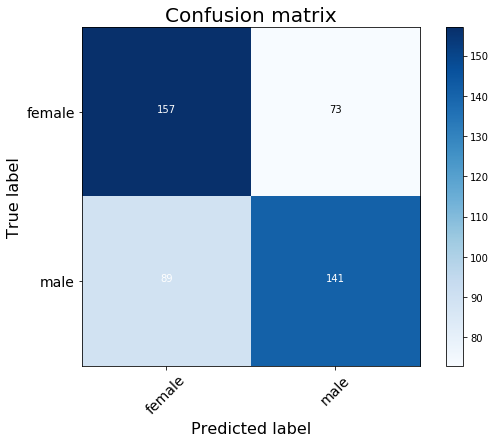

Classification Report 
               precision    recall  f1-score   support

      female       0.64      0.68      0.66       230
        male       0.66      0.61      0.64       230

    accuracy                           0.65       460
   macro avg       0.65      0.65      0.65       460
weighted avg       0.65      0.65      0.65       460

evaluating predictions...

Loss: 0.764
Accuracy: 64.78%


In [21]:
regular_resnet34 = load_model('regular-no-augmentation/ResNet-34-0.7200-31.hdf5')
predictions, labels = evaluate_model(regular_resnet34, test_datagen_resnet34, test_dir_regular, batch_size=100)

#### ResNet-18

Found 460 images belonging to 2 classes.
making predictions...
making confusion matrix...


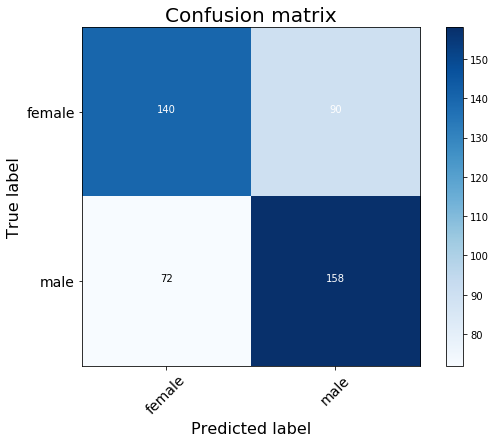

Classification Report 
               precision    recall  f1-score   support

      female       0.66      0.61      0.63       230
        male       0.64      0.69      0.66       230

    accuracy                           0.65       460
   macro avg       0.65      0.65      0.65       460
weighted avg       0.65      0.65      0.65       460

evaluating predictions...

Loss: 0.548
Accuracy: 64.78%


In [22]:
regular_resnet18 = load_model('regular-no-augmentation/ResNet-18-0.6600-39.hdf5')
predictions, labels = evaluate_model(regular_resnet18, test_datagen_resnet18, test_dir_regular, batch_size=100)

### Regular dataset with augmentation

In [23]:
os.listdir('regular-with-augmentation')

['.ipynb_checkpoints',
 'ResNet-18-0.6550-24.hdf5',
 'ResNet-34-0.6817-30.hdf5',
 'VGG16-0.6950-22.hdf5']

#### VGG16

Found 460 images belonging to 2 classes.
making predictions...
making confusion matrix...


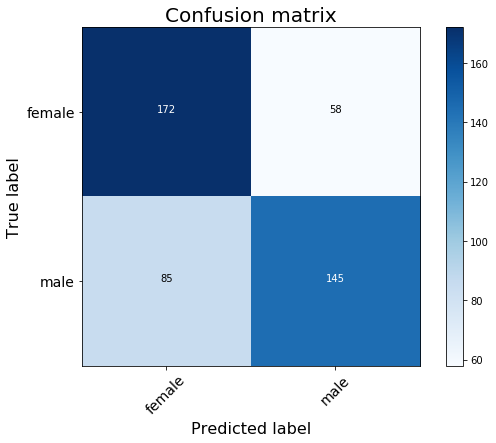

Classification Report 
               precision    recall  f1-score   support

      female       0.67      0.75      0.71       230
        male       0.71      0.63      0.67       230

    accuracy                           0.69       460
   macro avg       0.69      0.69      0.69       460
weighted avg       0.69      0.69      0.69       460

evaluating predictions...

Loss: 0.863
Accuracy: 68.91%


In [25]:
regular_augmented_vgg16 = load_model('regular-with-augmentation/VGG16-0.6950-22.hdf5')
predictions, labels = evaluate_model(regular_augmented_vgg16, test_datagen_vgg16, test_dir_regular, batch_size=100)

#### ResNet-34

Found 460 images belonging to 2 classes.
making predictions...
making confusion matrix...


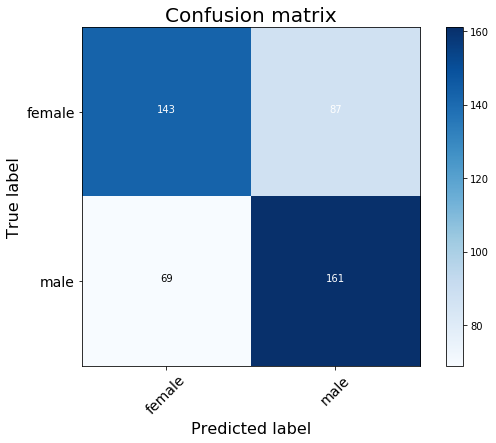

Classification Report 
               precision    recall  f1-score   support

      female       0.67      0.62      0.65       230
        male       0.65      0.70      0.67       230

    accuracy                           0.66       460
   macro avg       0.66      0.66      0.66       460
weighted avg       0.66      0.66      0.66       460

evaluating predictions...

Loss: 0.689
Accuracy: 66.09%


In [26]:
regular_augmented_resnet34 = load_model('regular-with-augmentation/ResNet-34-0.6817-30.hdf5')
predictions, labels = evaluate_model(regular_augmented_resnet34, test_datagen_resnet34, test_dir_regular, batch_size=100)

#### ResNet-18

Found 460 images belonging to 2 classes.
making predictions...
making confusion matrix...


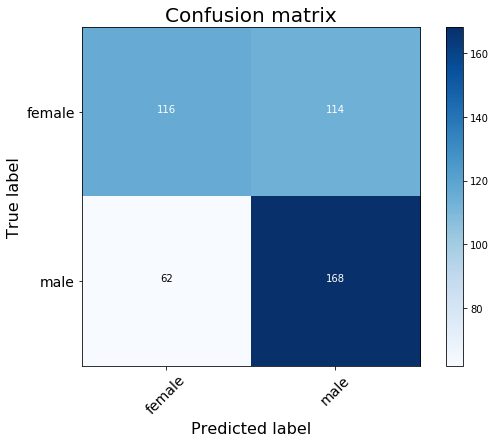

Classification Report 
               precision    recall  f1-score   support

      female       0.65      0.50      0.57       230
        male       0.60      0.73      0.66       230

    accuracy                           0.62       460
   macro avg       0.62      0.62      0.61       460
weighted avg       0.62      0.62      0.61       460

evaluating predictions...

Loss: 10.991
Accuracy: 61.74%


In [27]:
regular_augmented_resnet18 = load_model('regular-with-augmentation/ResNet-18-0.6550-24.hdf5')
predictions, labels = evaluate_model(regular_augmented_resnet18, test_datagen_resnet18, test_dir_regular, batch_size=100)